# quasi_xper library demo

## imports

In [1]:
!pwd

/Users/mottacrl/AMAZON/dev/github/2503_quasi_xper_new/quasi_xper/notebooks


In [2]:
# Add the `src` directory to sys.path
import sys
from pathlib import Path

# Get the current working directory (where the notebook is running)
notebook_dir = Path.cwd()

# Define the src directory path relative to the notebook directory
src_path = notebook_dir.parent / "src"
sys.path.append(str(src_path))

# Import the modules
from utils import plot_timeseries, prepare_fixed_effects_data, fit_fixed_effects_model, simulate_power
from test_utils import generate_trend_dataset, generate_dataset_sine  # Replace with actual functions from test_utils.py

In [19]:
%load_ext autoreload
%autoreload 2

from utils import plot_timeseries, prepare_fixed_effects_data, fit_fixed_effects_model#, simulate_power
from test_utils import generate_trend_dataset, generate_dataset_sine  # Replace with actual functions from test_utils.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. synthetic dataset with trend

In [4]:
start_date_pre = "2023-10-01"
end_date_pre = "2023-10-31"
start_date_post = "2023-11-01"
end_date_post = "2023-11-30"
treatment_units = ["Treated_Unit_1", "Treated_Unit_2"]  # List of treated units
control_units = ["Control_Unit_1", "Control_Unit_2", "Control_Unit_3"]
metric_slope = 0.5
treatment_shift = 20
random_noise_scale = 3
shifts = {unit: shift for unit, shift in zip(treatment_units + control_units, [30, 20, 10, 0, 15])}  

df = generate_trend_dataset(start_date_pre, end_date_pre, start_date_post, end_date_post, 
                            treatment_units, control_units, metric_slope, treatment_shift, 
                            random_noise_scale, shifts)

df.head()


,timestamp,unit,metric
0,2023-10-01,Control_Unit_3,17.663795
1,2023-10-01,Control_Unit_2,2.138001
2,2023-10-01,Treated_Unit_1,20.779655
3,2023-10-01,Control_Unit_1,14.232115
4,2023-10-01,Treated_Unit_2,21.142946


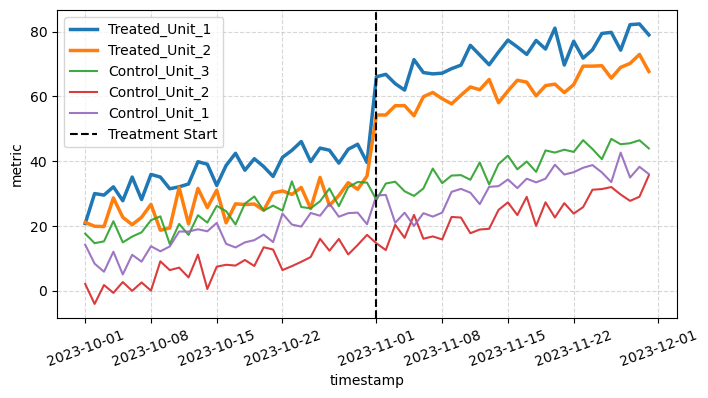

In [5]:
plot_timeseries(df, 'timestamp', 'unit', 'metric', treatment_units, start_date_post, tick_rotation=20)

## DID

In [6]:
prepared_df = prepare_fixed_effects_data(df, 'timestamp', 'unit', 'metric', start_date_post, treatment_units)

did_coefficient, p_value, confidence_interval, model = fit_fixed_effects_model(
    prepared_df, 
    metric_col='metric', 
    time_col='timestamp', 
    clustered_errors=False, 
    model_summary=False)
print(f"DID Coefficient: {did_coefficient}, the true value is {treatment_shift}")
print(f"Confidence Interval: {confidence_interval}")
print(f"P-value: {p_value}")

DID Coefficient: 19.913132313493385, the true value is 20
Confidence Interval: [18.60749631 21.21876831]
P-value: 4.019418773410249e-83


Fixed effects with clustered errors:

In [7]:
did_coefficient, p_value, confidence_interval, model = fit_fixed_effects_model(
    prepared_df, 
    metric_col='metric', 
    time_col='timestamp', 
    clustered_errors=True, 
    model_summary=False)
print(f"DID Coefficient: {did_coefficient}, the true value is {treatment_shift}")
print(f"Confidence Interval: {confidence_interval}")
print(f"P-value: {p_value}")

DID Coefficient: 19.913132313493385, the true value is 20
Confidence Interval: [17.85242754 21.97383709]
P-value: 5.375572449201471e-80


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 metric   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                -1.406e+15
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               1.00
Time:                        19:34:06   Log-Likelihood:                -713.40
No. Observations:                 305   AIC:                             1559.
Df Residuals:                     239   BIC:                             1804.
Df Model:                          65                                         
Covariance Type:              cluster                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.4699      1.445      5.171      0.000       4.638      10.301
Treated                          19.9131      1.051     18.940      0.000      17.852      21.974
unit_Control_Unit_2              -9.6045    1.5e-13  -6.41e+13      0.000      -9.604      -9.604
unit_Control_Unit_3               5.1469   5.99e-14   8.59e+13      0.000       5.147       5.147
unit_Treated_Unit_1              20.4263      0.517     39.503      0.000      19.413      21.440
unit_Treated_Unit_2              10.6082      0.517     20.516      0.000       9.595      11.622
timestamp_2023_10_02_00_00_00     3.2307      2.045      1.580      0.114      -0.778       7.240
timestamp_2023_10_03_00_00_00     4.3636      1.335      3.268      0.001       1.747       6.980
timestamp_2023_10_04_00_00_00     4.4001      1.008      4.366      0.000       2.425       6.375
timestamp_2023_10_05_00_00_00     4.1058      0.885      4.637      0.000       2.370       5.841
timestamp_2023_10_06_00_00_00     6.4181      3.073      2.088      0.037       0.394      12.442
timestamp_2023_10_07_00_00_00     5.8699      1.967      2.984      0.003       2.014       9.725
timestamp_2023_10_08_00_00_00     5.4872      1.948      2.817      0.005       1.669       9.305
timestamp_2023_10_09_00_00_00     9.5842      1.699      5.642      0.000       6.255      12.914
timestamp_2023_10_10_00_00_00     6.7248      0.979      6.872      0.000       4.807       8.643
timestamp_2023_10_11_00_00_00     7.6243      2.313      3.296      0.001       3.090      12.158
timestamp_2023_10_12_00_00_00     5.1633      1.592      3.244      0.001       2.044       8.283
timestamp_2023_10_13_00_00_00     5.7359      1.307      4.390      0.000       3.175       8.297
timestamp_2023_10_14_00_00_00     8.0977      1.284      6.306      0.000       5.581      10.614
timestamp_2023_10_15_00_00_00    11.4049      1.658      6.879      0.000       8.155      14.654
timestamp_2023_10_16_00_00_00     9.4201      1.506      6.254      0.000       6.468      12.372
timestamp_2023_10_17_00_00_00     9.2686      1.375      6.741      0.000       6.574      11.963
timestamp_2023_10_18_00_00_00    11.4796      2.018      5.688      0.000       7.524      15.435
timestamp_2023_10_19_00_00_00    11.8957      2.524      4.713      0.000       6.949      16.843
timestamp_2023_10_20_00_00_00    12.4035      1.350      9.185      0.000       9.757      15.050
timestamp_2023_10_21_00_00_00    10.9005      1.181      9.228      0.000       8.585      13.216
timestamp_2023_10_22_00_00_00    10.2204      0.978     10.455      0.000       8.304      12.136
timestamp_2023_10_23_00_00_00    13.4403      1.614      8.327      0.000      10.277      16.604
timestamp_2023_10_24_00_00_00    12.4952     

# 2. synthetic dataset with periodicity

In [12]:
# Define parameters
start_date_pre = "2023-10-01"
end_date_pre = "2023-10-31"
start_date_post = "2023-11-01"
end_date_post = "2023-11-30"
treatment_units = ["Treated_Unit_1", "Treated_Unit_2"]  # Multiple treated units
control_units = ["Control_Unit_1", "Control_Unit_2", "Control_Unit_3"]
treatment_shift = 10
random_noise_scale = 3
# Define shifts as a dictionary
shifts = {
    "Treated_Unit_1": 15,
    "Treated_Unit_2": 10,
    "Control_Unit_1": 5,
    "Control_Unit_2": 0,
    "Control_Unit_3": -5
}

# Generate dataset
df = generate_dataset_sine(
    start_date_pre, end_date_pre, start_date_post, end_date_post,
    treatment_units, control_units, treatment_shift, random_noise_scale, shifts
)

# Display first rows
print(df.head())

   timestamp            unit     metric
0 2023-10-01  Control_Unit_3  -8.878295
1 2023-10-01  Control_Unit_2  -3.419185
2 2023-10-01  Treated_Unit_1  14.694277
3 2023-10-01  Control_Unit_1   1.635306
4 2023-10-01  Treated_Unit_2  10.381901


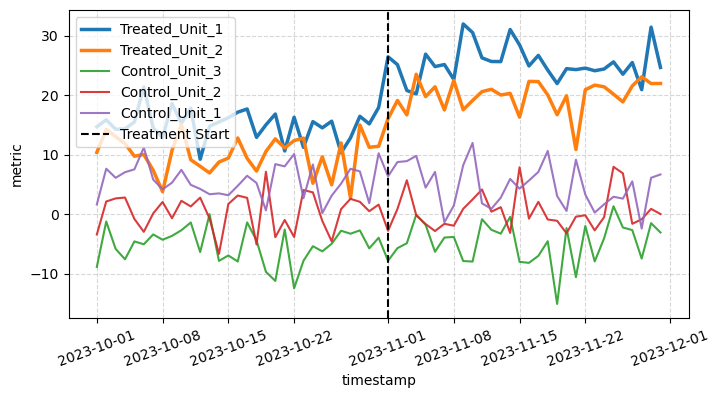

In [13]:
plot_timeseries(df, 'timestamp', 'unit', 'metric', treatment_units, start_date_post, tick_rotation=20)

## DID

In [14]:
prepared_df = prepare_fixed_effects_data(df, 'timestamp', 'unit', 'metric', start_date_post, treatment_units)

did_coefficient, p_value, confidence_interval, model = fit_fixed_effects_model(
    prepared_df, 
    metric_col='metric', 
    time_col='timestamp', 
    clustered_errors=True, 
    model_summary=False)
print(f"DID Coefficient: {did_coefficient}, the true value is {treatment_shift}")
print(f"Confidence Interval: {confidence_interval}")
print(f"P-value: {p_value}")

DID Coefficient: 10.171479159315803, the true value is 10
Confidence Interval: [ 9.29062566 11.05233266]
P-value: 2.0848633791284746e-113


## Synthetic DID

In [15]:
from utils import estimate_synthetic_did

In [16]:
did_coefficient, p_value, confidence_interval, model, weights_dict = estimate_synthetic_did(
    df=df, time_col='timestamp', unit_col='unit', 
                       metric_col='metric', treatment_units=treatment_units, 
                       treatment_timestamp=start_date_post, 
                          clustered_errors=False, model_summary=False)
print(did_coefficient, p_value)



10.17147915931587 1.3914755769862497e-33


In [44]:
df.head()

,timestamp,unit,metric,After,Treated,original_unit
0,2023-10-01,Control_Unit_3,-3.054228,False,False,Control_Unit_3
1,2023-10-01,Control_Unit_2,-2.941391,False,False,Control_Unit_2
2,2023-10-01,Treated_Unit_1,16.909693,False,False,Treated_Unit_1
3,2023-10-01,Control_Unit_1,4.390764,False,False,Control_Unit_1
4,2023-10-01,Treated_Unit_2,5.290358,False,False,Treated_Unit_2


In [10]:
sdid_effect, pvalue, conf_int = estimate_synthetic_did(
    df, 'timestamp', 'unit', 'metric', treatment_units, start_date_post, clustered_errors=False)
print(f"{sdid_effect=}\n{pvalue=}\n{conf_int=}")

sdid_effect=19.913132313493385
pvalue=4.019418773410249e-83
conf_int=array([18.60749631, 21.21876831])


## power analysis

generating an only-pre period dataset

In [11]:
# Define parameters
start_date_pre = "2023-10-01"
end_date_pre = "2023-10-31"
start_date_post = "2023-11-01"
end_date_post = "2023-11-30"
treatment_units = ["Treated_Unit_1", "Treated_Unit_2"]  # Multiple treated units
control_units = ["Control_Unit_1", "Control_Unit_2", "Control_Unit_3"]
treatment_shift = 0
random_noise_scale = 3
# Define shifts as a dictionary
shifts = {
    "Treated_Unit_1": 15,
    "Treated_Unit_2": 10,
    "Control_Unit_1": 5,
    "Control_Unit_2": 0,
    "Control_Unit_3": -5
}

# Generate dataset
df = generate_dataset_sine(
    start_date_pre, end_date_pre, start_date_post, end_date_post,
    treatment_units, control_units, treatment_shift, random_noise_scale, shifts
)

# Display first rows
print(df.head())

   timestamp            unit     metric
0 2023-10-01  Control_Unit_3  -2.575894
1 2023-10-01  Control_Unit_2   0.054966
2 2023-10-01  Treated_Unit_1  14.309968
3 2023-10-01  Control_Unit_1   2.446109
4 2023-10-01  Treated_Unit_2  11.397600


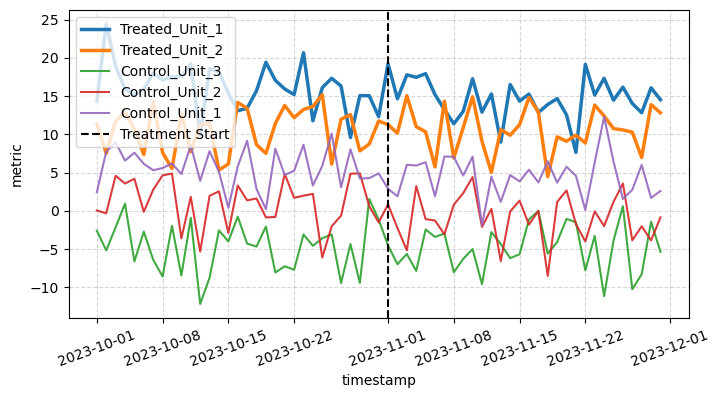

In [12]:
plot_timeseries(df, 'timestamp', 'unit', 'metric', treatment_units, start_date_post, tick_rotation=20)

In [15]:
print(simulate_power.__doc__)


    Simulates power by estimating model significance over multiple iterations with multiple treatments.
    
    Parameters:
    - df (pd.DataFrame): The original panel data.
    - metric_col (str): The metric column.
    - time_col (str): The time column.
    - unit_col (str): The unit column.
    - treatment_units (list): List of treated units.
    - period_length (int): Number of days in pre- and post-treatment periods.
    - mde_pc (float): Minimum detectable effect as a percentage.
    - n_iterations (int): Number of simulation iterations.
    - α (float): Significance level.
    - clustered_errors (bool, optional): Use clustered errors. Default is True.
    
    Returns:
    - dict: A dictionary mapping each treatment unit to its estimated power.
    


In [20]:
treatment_timestamp = pd.Timestamp('2023-01-15')  # Example date
period_length = 30  # Days in pre and post periods
mde_pc = 0.1  # Minimum detectable effect as 10% of the pre-treatment average
n_iterations = 100  # Number of simulation iterations
α = 0.05  # Significance level

power = simulate_power(df, metric_col='metric', time_col='timestamp', unit_col='unit',
                       treatment_units=treatment_units,
                       period_length=period_length, mde_pc=mde_pc, n_iterations=n_iterations, α=α)

print(f"Estimated Power: {power}")

Estimated Power: {'Treated_Unit_1': 0.52, 'Treated_Unit_2': 0.52}


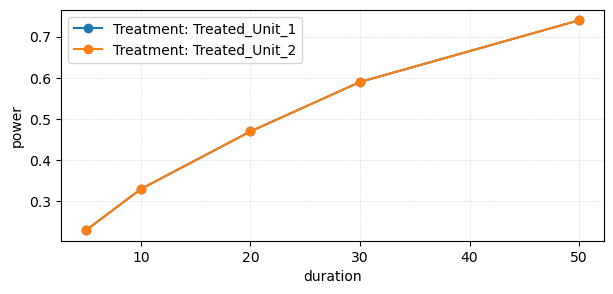

In [23]:
def plot_power_vs_size(sample_size_l, power_dict, data_folder=None, filename=None):
    """
    Plots power vs. sample size for multiple treatment units.

    Parameters:
    - sample_size_l (list): List of sample sizes (durations).
    - power_dict (dict): Dictionary where keys are treatment units, values are lists of power estimates.
    - data_folder (str, optional): Folder to save the plot.
    - filename (str, optional): Filename to save the plot.

    Returns:
    - None (displays or saves the plot).
    """
    fig, ax = plt.subplots(figsize=(7, 3))
    
    # Plot power curves for each treatment unit
    for unit, power_l in power_dict.items():
        ax.plot(sample_size_l, power_l, '-o', label=f'Treatment: {unit}')
    
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    ax.set(xlabel='duration', ylabel='power')
    ax.legend()
    
    if filename:
        plt.savefig(data_folder + filename)

    plt.show()

# Parameters
iterations = 100
α = 0.05
sample_size_l = [5, 10, 20, 30, 50]
treatment_units = ["Treated_Unit_1", "Treated_Unit_2"]

# Dictionary to store power values for each treatment unit
power_dict = {unit: [] for unit in treatment_units}

# Run power simulations for different sample sizes
for sample_size in sample_size_l:
    power_results = simulate_power(
        df, metric_col='metric', time_col='timestamp', unit_col='unit',
        treatment_units=treatment_units, period_length=sample_size,
        mde_pc=mde_pc, n_iterations=iterations, α=α
    )
    
    # Store results per treatment unit
    for unit in treatment_units:
        power_dict[unit].append(power_results[unit])

# Plot results
plot_power_vs_size(sample_size_l, power_dict)


In [21]:
def plot_power_vs_size(sample_size_l, power_l, data_folder=None, filename=None):
    fig,ax = plt.subplots(1,1,figsize=(7,3))
    ax.plot(sample_size_l,power_l, '-o')
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    ax.set(xlabel='duration', ylabel='power')
    if filename:
        plt.savefig(data_folder+filename)
    plt.show()

In [22]:
%%time
power_l = []
iterations = 200
α=0.05
sample_size_l = [5,10,20,30, 50]
for sample_size in sample_size_l:
    
    power = simulate_power(df, metric_col='metric', time_col='timestamp', unit_col='unit',
                           treatment_unit='treatment', treatment_timestamp=start_date_post,
                           period_length=period_length, mde_pc=mde_pc, n_iterations=n_iterations, α=α)

    power_l.append(power)

TypeError: simulate_power() got an unexpected keyword argument 'treatment_unit'

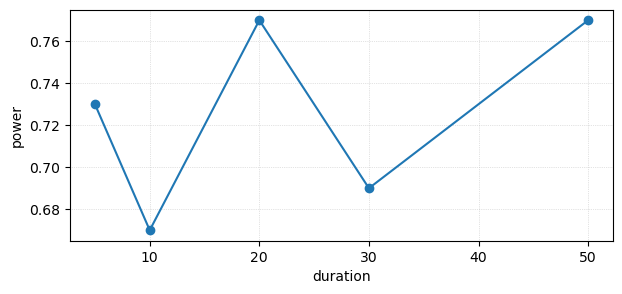

In [50]:
plot_power_vs_size(sample_size_l, power_l)